### 기본 세팅

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('axes', unicode_minus=False)

warnings.filterwarnings("ignore")

### GMM(Gaussian Mixture Model)

In [3]:
# IRIS 데이터
from sklearn.datasets import load_iris

iris = load_iris()
feature_name = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

iris_df = pd.DataFrame(iris.data, columns=feature_name)
iris_df["target"] = iris.target

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
from sklearn.mixture import GaussianMixture

# GMM: n_components = 모델의 총 수
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# target, gmm_cluster 비교
iris_df["gmm_cluster"] = [c for c in gmm_cluster_labels]

iris_df.groupby(["target", "gmm_cluster"]).size()

'''
target | gmm_cluster
0 | 1
1 | 0
2 | 2
'''

'\ntarget | gmm_cluster\n0 | 1\n1 | 0\n2 | 2\n'

In [5]:
# 군집분석 시각화 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):

    # 군집별 중심 위치
    if iscenter:
        centers = clusterobj.cluster_centers_
    
    # Cluster 값 종류
    unique_labels = np.unique(dataframe[label_name].values)

    markers = ['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        # 군집별 데이터 프레임
        label_cluster = dataframe[dataframe[label_name] == label]

        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)

        # 각 군집 시각화
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70, edgecolors='k', marker=markers[label], label=cluster_legend)

         # 군집별 중심 위치 시각화
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
            
    if isNoise:
        legend_loc='upper center'
    else: 
        legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

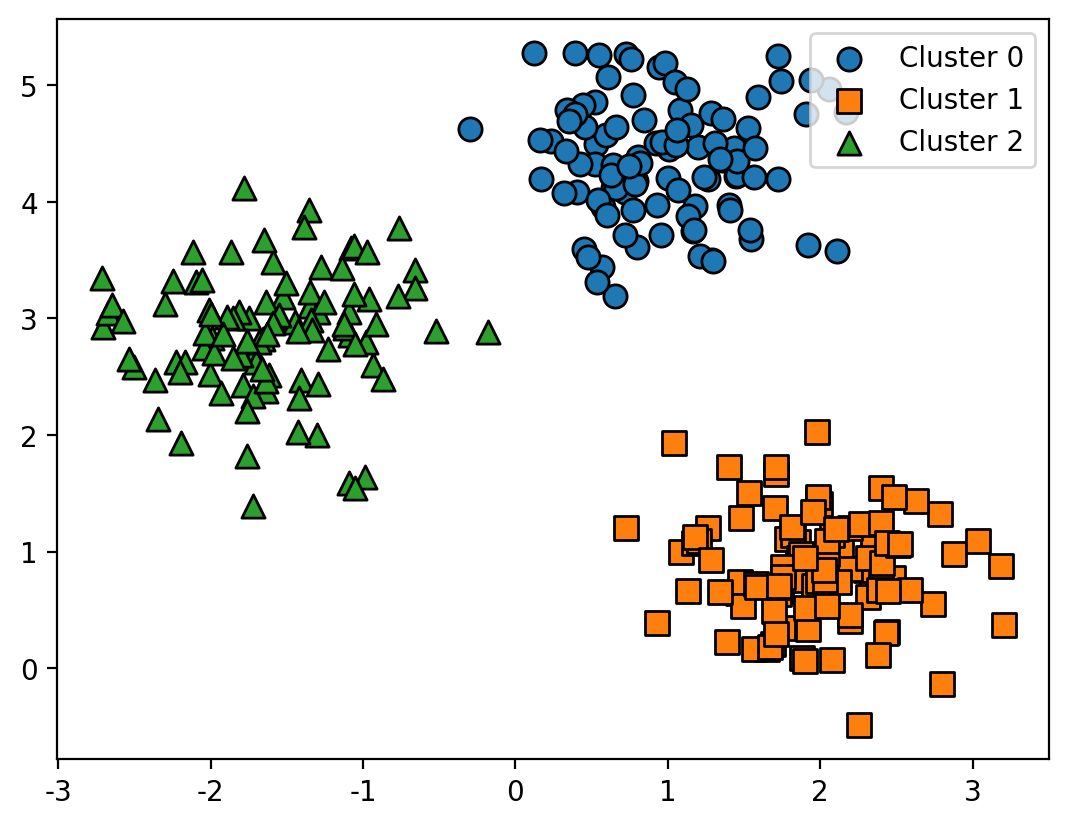

In [6]:
# 가상데이터 (원형)

from sklearn.datasets import make_blobs

# 가상데이터
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 데이터 프레임
cluster_df = pd.DataFrame(X, columns=["ftr1","ftr2"])
cluster_df["target"] = y

# 가상데이터 시각화
visualize_cluster_plot(None, cluster_df, "target", iscenter=False)

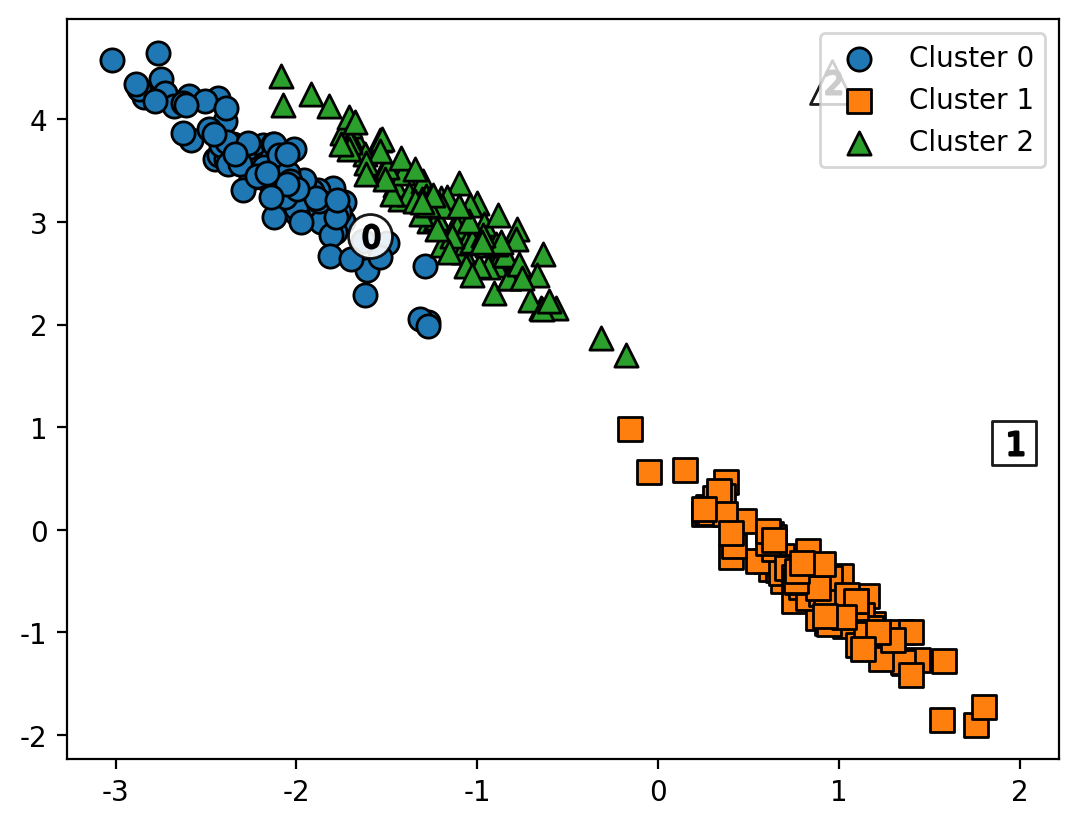

In [10]:
from sklearn.cluster import KMeans

# KMeans
kmeans = KMeans(n_clusters=3)
kmeans_label = kmeans.fit_predict(X)

# 군집 레이블 추가
cluster_df["kmeans_label"] = kmeans_label

# 군집분석 시각화
visualize_cluster_plot(kmeans, cluster_df, "kmeans_label", iscenter=True)

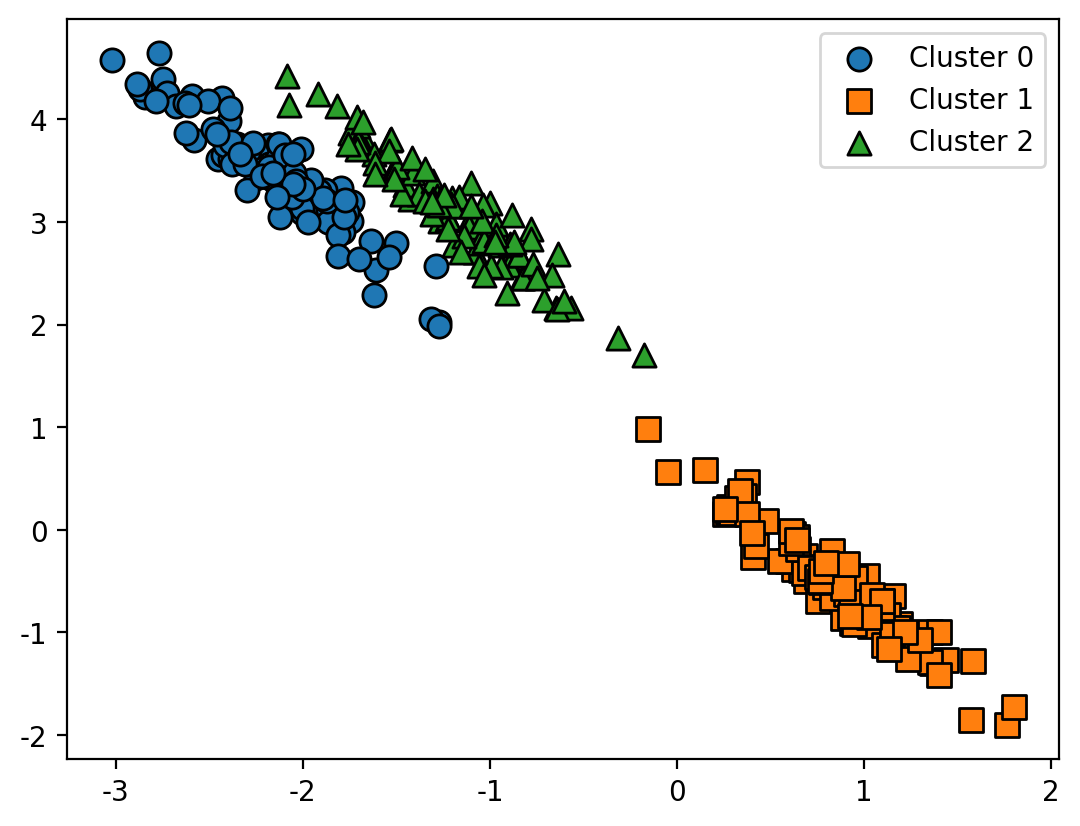

In [11]:
# GMM
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit_predict(X_aniso)

# 군집 레이블 추가
cluster_df["gmm_label"] = gmm_label

# GMM은 cluster_centers_ 속성이 없음
visualize_cluster_plot(gmm, cluster_df, 'gmm_label',iscenter=False)

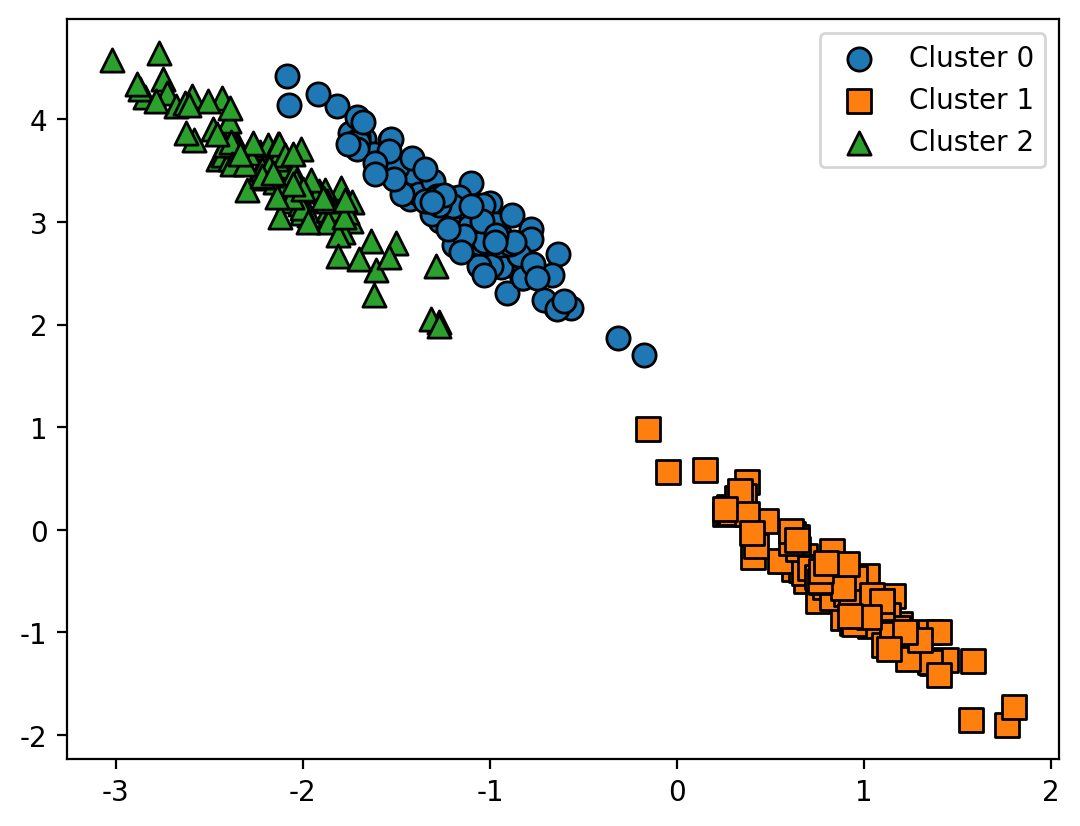

In [8]:
# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = X @ transformation

# 데이터 프레임
cluster_df = pd.DataFrame(X_aniso, columns=["ftr1","ftr2"])
cluster_df["target"] = y

# 가상데이터 시각화
visualize_cluster_plot(None, cluster_df, "target", iscenter=False)

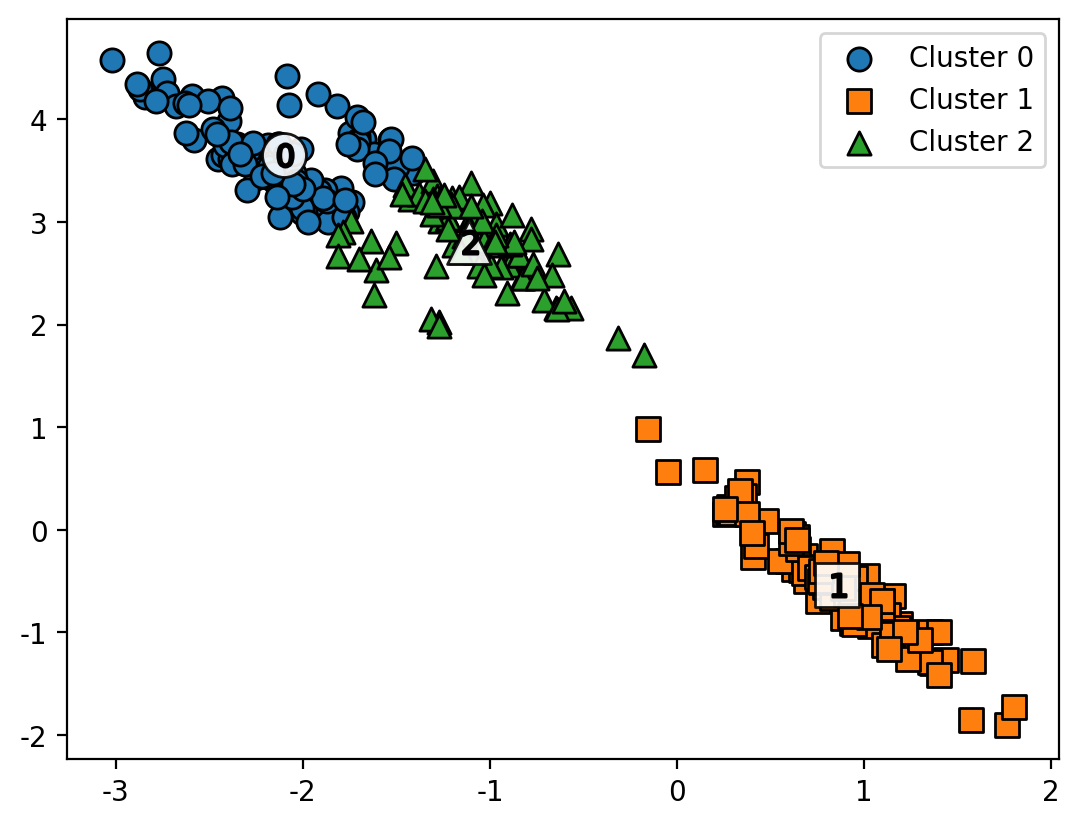

In [12]:
# KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)

# 군집 레이블 추가
cluster_df["kmeans_label"] = kmeans_label

# 군집분석 시각화
visualize_cluster_plot(kmeans, cluster_df, "kmeans_label", iscenter=True)

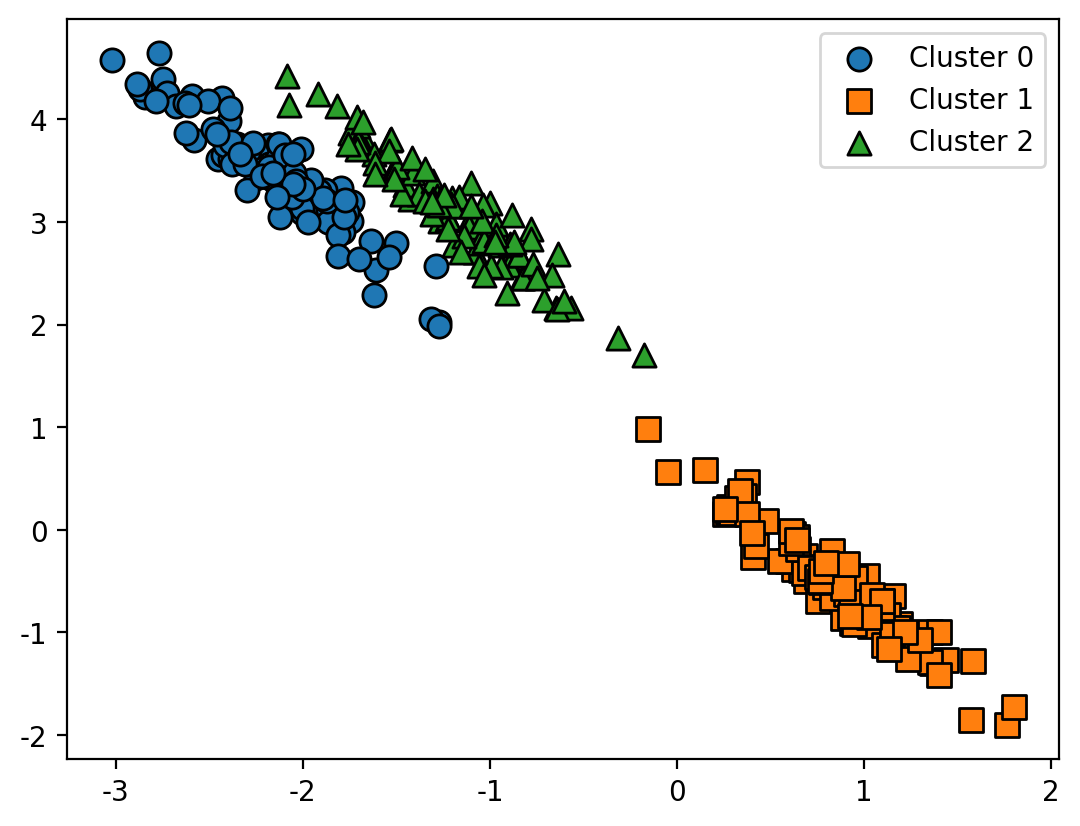

In [13]:
# GMM
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit_predict(X_aniso)

# 군집 레이블 추가
cluster_df["gmm_label"] = gmm_label

# GMM은 cluster_centers_ 속성이 없음
visualize_cluster_plot(gmm, cluster_df, 'gmm_label',iscenter=False)

In [14]:
print('### KMeans Clustering ###')
print(cluster_df.groupby('target')['kmeans_label'].value_counts())

print('\n### Gaussian Mixture Clustering ###')
print(cluster_df.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64
